##  Metadata Statistics & Preprocessing

In [2]:
import warnings
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np

In [3]:
from utils import preprocess_metadata, plot_statistics_by_label, compute_correlation_heatmap
warnings.filterwarnings("ignore")

Number of train patients 163
Number of train patients of class 0 : 50
Number of train patients of class 1 : 113
Number of test patients 42


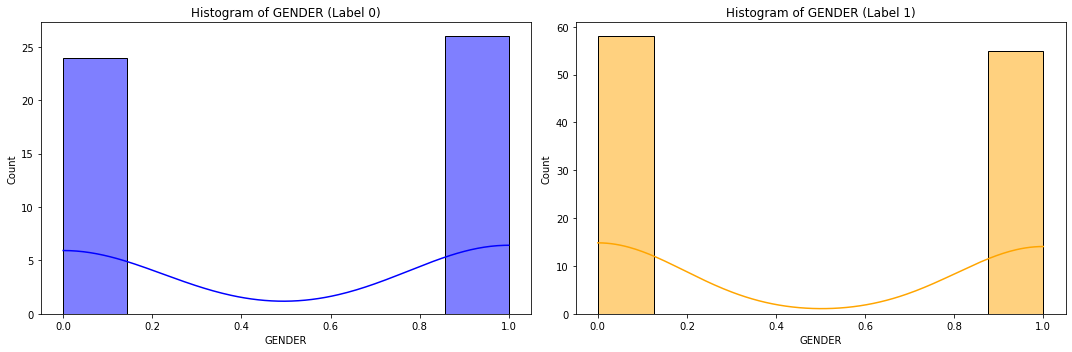

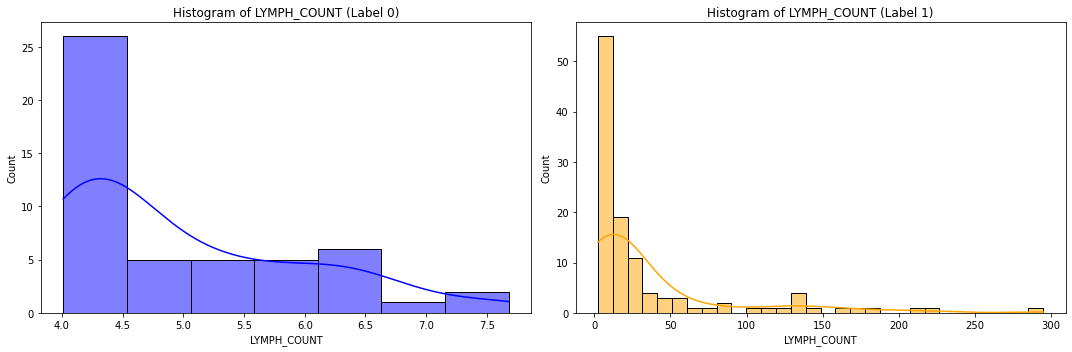

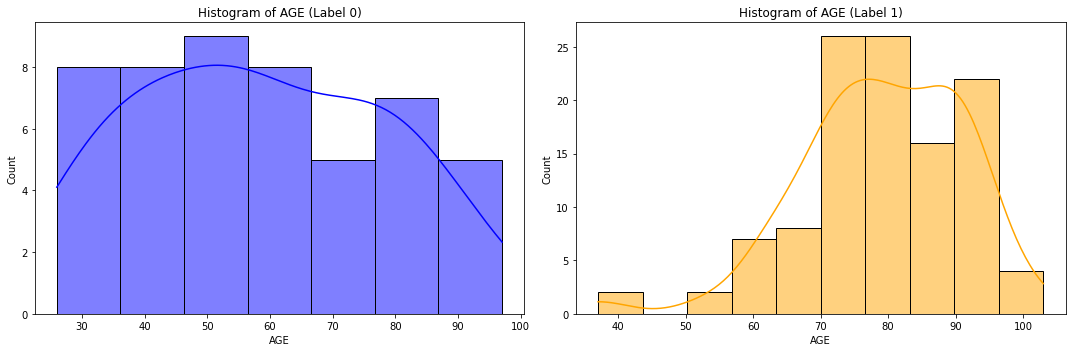

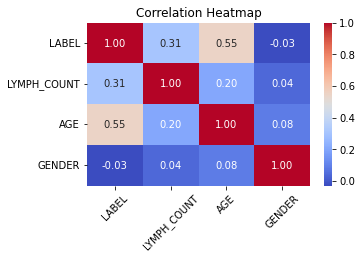

In [4]:
train_set_meta, test_set_meta = preprocess_metadata()
print("Number of train patients",train_set_meta.shape[0])
print("Number of train patients of class 0 :", train_set_meta[train_set_meta['LABEL'] == 0].shape[0])
print("Number of train patients of class 1 :", train_set_meta[train_set_meta['LABEL'] == 1].shape[0])
print("Number of test patients",test_set_meta.shape[0])
plot_statistics_by_label(train_set_meta)
compute_correlation_heatmap(train_set_meta)

In [5]:
print("Number of train patients of class 0 :", train_set_meta[train_set_meta['GENDER'] == 1].shape[0])

Number of train patients of class 0 : 81


**Comments**

* Imbalanced dataset
* Gender is equally distributed between both classes : (No gender bias)
* Young patients are more reactive and Malignant patients have the tendancy to be old
* All patients with significally high Lymph are malignant

## Images

#### load / kmean binary segmentation

In [6]:
from utils import k_means_binary_seg

In [7]:
train_path='../dataset/trainset'
test_path='../dataset/trainset'
train_patients = os.listdir(train_path)
test_patients = os.listdir(test_path)
sample = train_patients[0]
images_path_patient = [train_path+'/'+sample+'/'+l for l in os.listdir(train_path+'/'+sample)]
image_list = [np.array(Image.open(image))/255  for image in images_path_patient]


show some samples of the patient P0 of label 1


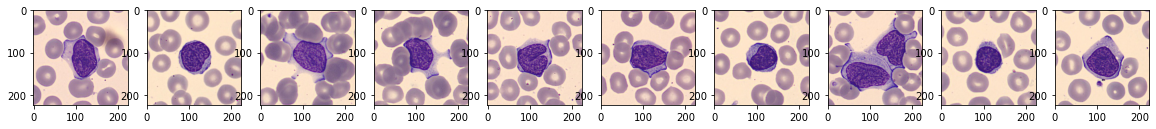

In [8]:
print(f"show some samples of the patient {sample} of label {train_set_meta.loc['P0', 'LABEL']}")
i=1
plt.figure(figsize=(20,2))
for image in image_list[:10]:
    plt.subplot(1,10,i)
    plt.imshow(image)
    plt.grid(False)
    i+=1

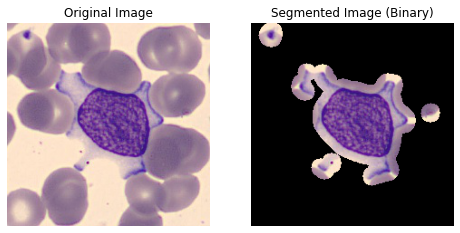

In [24]:
image = image_list[2]
result_image = k_means_binary_seg(image)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(result_image)
plt.title('Segmented Image (Binary)')
plt.axis('off')

plt.show()
